# Accessing data in a DataSet

After a measurement is completed all the acquired data and metadata around it is accessible via a `DataSet` object. This notebook presents the useful methods and properties of the `DataSet` object which enable convenient access to the data, parameters information, and more.

Todo:
- add standalones to the dataset

## Preparation: a DataSet from a dummy Measurement

In order to obtain a `DataSet` object, we are going to run a `Measurement` storing some dummy data (see `Dataset Context Manager` notebook for more details).

In [1]:
import tempfile
import os

import numpy as np

import qcodes
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
from qcodes.dataset.plotting import plot_dataset

In [2]:
db_path = os.path.join(tempfile.gettempdir(), 'data_access_example.db')
initialise_or_create_database_at(db_path)

exp = load_or_create_experiment(experiment_name='greco', sample_name='draco')

In [3]:
x = Parameter(name='x', label='Voltage', unit='V',
              set_cmd=None, get_cmd=None)
t = Parameter(name='t', label='Time', unit='s',
              set_cmd=None, get_cmd=None)
y = Parameter(name='y', label='Voltage', unit='V',
              set_cmd=None, get_cmd=None)
y2 = Parameter(name='y2', label='Current', unit='A',
               set_cmd=None, get_cmd=None)

In [4]:
meas = Measurement(exp=exp)

meas.register_parameter(x)
meas.register_parameter(t)
meas.register_parameter(y, setpoints=(x, t))
meas.register_parameter(y2, setpoints=(x, t))

x_vals = np.linspace(-4, 5, 50)
t_vals = np.linspace(-500, 1500, 25)

with meas.run() as datasaver:
    for xv in x_vals:
        for tv in t_vals:
            yv = np.sin(2*np.pi*xv)*np.cos(2*np.pi*0.001*tv) + 0.001*tv
            y2v = np.sin(2*np.pi*xv)*np.cos(2*np.pi*0.001*tv + 0.5*np.pi) - 0.001*tv
            datasaver.add_result((x, xv), (t, tv), (y, yv), (y2, y2v))

dataset = datasaver.dataset

Starting experimental run with id: 2


For the sake of demonstating what kind of data we've produced, let's use `plot_dataset` to make some default plots of the data.

([<matplotlib.axes._subplots.AxesSubplot at 0x118c11b90>,
  <matplotlib.colorbar.Colorbar at 0x118d05d90>])

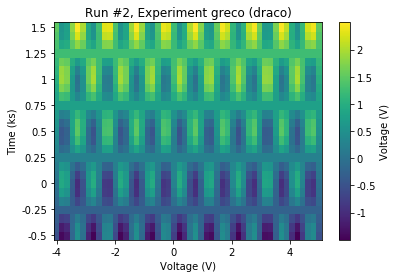

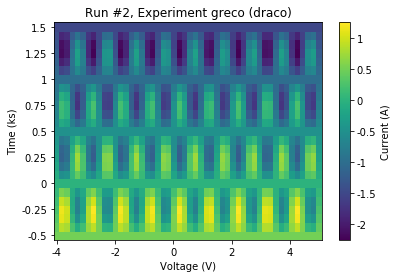

In [5]:
plot_dataset(dataset)

## DataSet indentification

Before we dive into what's in the `DataSet`, let's briefly note how a `DataSet` is identified.

In [6]:
dataset.captured_run_id

2

In [7]:
dataset.exp_name

'greco'

In [8]:
dataset.sample_name

'draco'

## Parameters in the DataSet

In this section we are getting information about the parameters stored in the given `DataSet`.

In [9]:
# dataset.parameters
# dataset.get_parameters()

In [10]:
dataset.paramspecs

{'x': ParamSpec('x', 'numeric', 'Voltage', 'V', inferred_from=[], depends_on=[]),
 't': ParamSpec('t', 'numeric', 'Time', 's', inferred_from=[], depends_on=[]),
 'y': ParamSpec('y', 'numeric', 'Voltage', 'V', inferred_from=[], depends_on=['x', 't']),
 'y2': ParamSpec('y2', 'numeric', 'Current', 'A', inferred_from=[], depends_on=['x', 't'])}

In [12]:
dataset.dependent_parameters

(ParamSpecBase('y', 'numeric', 'Voltage', 'V'),
 ParamSpecBase('y2', 'numeric', 'Current', 'A'))

In [13]:
dataset.description.interdeps

InterDependencies_(dependencies={ParamSpecBase('y', 'numeric', 'Voltage', 'V'): (ParamSpecBase('x', 'numeric', 'Voltage', 'V'), ParamSpecBase('t', 'numeric', 'Time', 's')), ParamSpecBase('y2', 'numeric', 'Current', 'A'): (ParamSpecBase('x', 'numeric', 'Voltage', 'V'), ParamSpecBase('t', 'numeric', 'Time', 's'))}, inferences={}, standalones=frozenset())

In [26]:
dataset.description.interdeps.dependencies

{ParamSpecBase('y', 'numeric', 'Voltage', 'V'): (ParamSpecBase('x', 'numeric', 'Voltage', 'V'),
  ParamSpecBase('t', 'numeric', 'Time', 's')),
 ParamSpecBase('y2', 'numeric', 'Current', 'A'): (ParamSpecBase('x', 'numeric', 'Voltage', 'V'),
  ParamSpecBase('t', 'numeric', 'Time', 's'))}

In [27]:
dataset.description.interdeps.standalones

frozenset()

In [28]:
dataset.description.interdeps.non_dependencies

(ParamSpecBase('y', 'numeric', 'Voltage', 'V'),
 ParamSpecBase('y2', 'numeric', 'Current', 'A'))

In [29]:
# dataset.description.interdeps.inferences

In [30]:
dataset.description.interdeps.paramspecs

(ParamSpecBase('y', 'numeric', 'Voltage', 'V'),
 ParamSpecBase('x', 'numeric', 'Voltage', 'V'),
 ParamSpecBase('t', 'numeric', 'Time', 's'),
 ParamSpecBase('y2', 'numeric', 'Current', 'A'))

In [31]:
dataset.description.interdeps.names

('y', 'x', 't', 'y2')

## Getting data from DataSet

??

In [61]:
dataset.get_data
dataset.get_values
dataset.get_setpoints

<bound method DataSet.get_data of results #1@/var/folders/3c/1hn5sc913p7dr8b07jgqqwtm0000gn/T/data_access_example.db
----------------------------------------------------------------------------------
x - numeric
t - numeric
y - numeric
y2 - numeric>

In [17]:
dataset.get_parameter_data()

{'y': {'y': array([-0.5       , -0.41666667, -0.33333333, ...,  1.33333333,
          1.41666667,  1.5       ]),
  'x': array([-4., -4., -4., ...,  5.,  5.,  5.]),
  't': array([-500.        , -416.66666667, -333.33333333, ..., 1333.33333333,
         1416.66666667, 1500.        ])},
 'y2': {'y2': array([ 0.5       ,  0.41666667,  0.33333333, ..., -1.33333333,
         -1.41666667, -1.5       ]),
  'x': array([-4., -4., -4., ...,  5.,  5.,  5.]),
  't': array([-500.        , -416.66666667, -333.33333333, ..., 1333.33333333,
         1416.66666667, 1500.        ])}}